# Test noise simulation methods

In [12]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

%matplotlib inline

if os.getcwd().split('/')[-1] == "notebooks":
    %cd ..

# Import noise simulator
from scripts.noise_simulation import NoiseConfiguration, NoiseSimulator, NoiseType


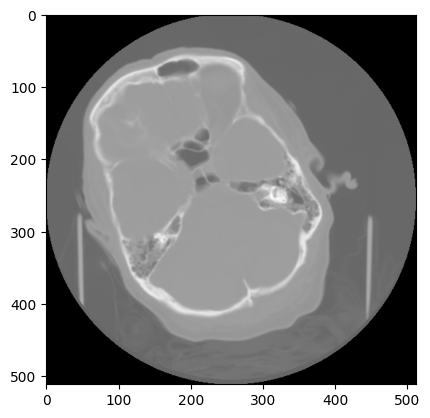

In [13]:
img_path = 'data/raw/test.dcm'
img_dicom = pydicom.dcmread(img_path)
# convert to numpy array
# Check the PhotometricInterpretation metadata
if img_dicom.PhotometricInterpretation == 'MONOCHROME1':
    image = np.invert(img_dicom.pixel_array)
else:
    image = img_dicom.pixel_array

# Rescale the pixel values to [0, 255]
image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# Convert to grayscale
grayscale_image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

# show original image
plt.imshow(grayscale_image)

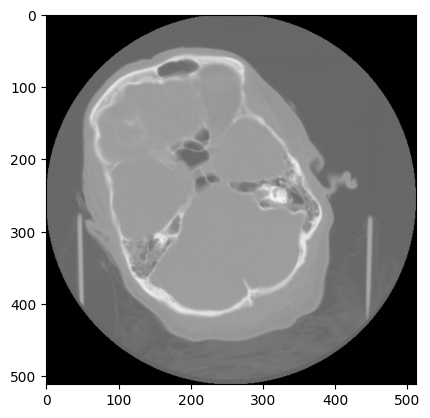

In [14]:
# noise_types, noise_levels, train_noise_ratio, val_noise_ratio, test_noise_ratio
simulation_config = NoiseConfiguration([NoiseType.GAUSSIAN], [0.01])
noisy_img = NoiseSimulator.apply_noise(grayscale_image, simulation_config)

# show noisy image
plt.imshow(noisy_img)